In [1]:
import pyod as od
from matplotlib import pyplot
from pyod.models.knn import KNN  # kNN detector
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


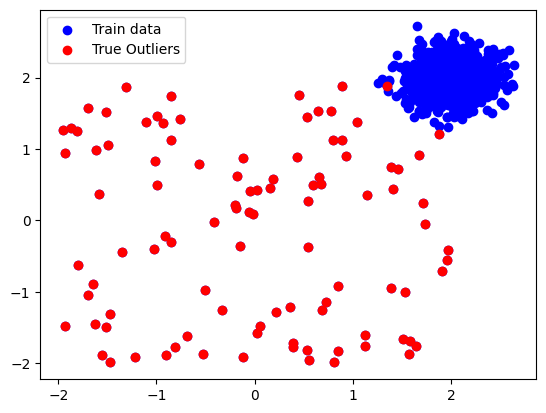

In [17]:
# generate data
X_train, X_test, y_train, y_test = od.utils.generate_data(
    n_train=1000, n_test=0, n_features=2, contamination=0.1, random_state=123
)
pyplot.scatter(X_train[:, 0], X_train[:, 1], c='blue', label='Train data')
# pyplot.scatter(X_test[:, 0], X_test[:, 1], c='red', label='Test data')
# show outliers
pyplot.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='red', label='True Outliers')

pyplot.legend()
pyplot.show()

Z-score detected outliers at indices: [900 900 901 902 903 903 904 904 905 906 907 907 908 909 910 911 913 913
 914 914 915 915 916 917 917 918 919 919 920 920 921 922 923 923 924 924
 925 925 926 927 927 928 928 929 929 930 930 931 932 932 933 933 934 934
 935 936 936 937 938 939 940 940 941 941 942 942 943 943 945 945 946 946
 947 947 948 948 949 950 950 951 952 953 954 955 955 956 956 957 958 958
 959 959 960 961 962 962 963 964 964 965 965 966 966 967 967 968 969 970
 971 972 972 973 974 974 975 975 976 977 978 979 979 980 980 981 981 983
 983 984 985 987 987 989 989 990 991 991 992 992 994 995 995 996 996 997
 997 998]


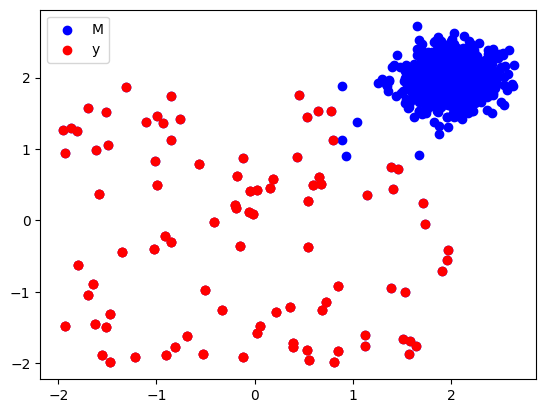

Best threshold: 1.16 with F1 score: 0.9746192893401016


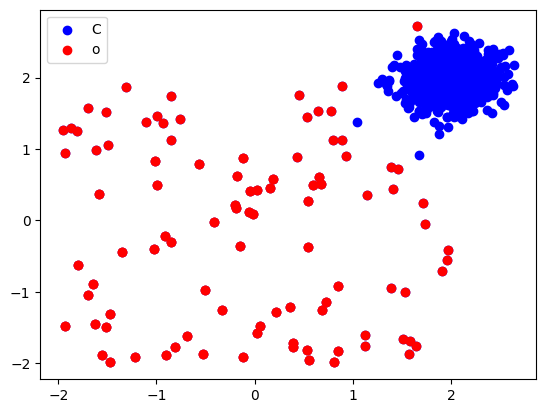

In [26]:
# using Z scores
import numpy as np
from scipy import stats
z_scores = np.abs(stats.zscore(X_train))
threshold = 1.23
outliers = np.where(z_scores > threshold)
print("Z-score detected outliers at indices:", outliers[0])
# plot Z score outliers
pyplot.scatter(X_train[:, 0], X_train[:, 1], c='blue', label='Train data')
pyplot.scatter(X_train[outliers[0], 0], X_train[outliers[0], 1], c='red', label='Z-score Outliers')
pyplot.legend("My best Z-score outliers")
pyplot.show()

# Computing the threshold for maximizing outlier detection wth f1 -- out of scope for lab i was just curious
from sklearn.metrics import f1_score
best_threshold = 0
best_f1 = 0
for threshold in np.arange(0, 3, 0.01):
    outliers = np.where(z_scores > threshold)
    y_pred = np.zeros_like(y_train)
    y_pred[outliers[0]] = 1
    f1 = f1_score(y_train, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
print("Best threshold:", best_threshold, "with F1 score:", best_f1)
# plot best Z score outliers
outliers = np.where(z_scores > best_threshold)
pyplot.scatter(X_train[:, 0], X_train[:, 1], c='blue', label='Train data')
pyplot.scatter(X_train[outliers[0], 0], X_train[outliers[0], 1], c='red', label='Best Z-score Outliers')
pyplot.legend("Computed Z-score outliers")
pyplot.show()

np.float64(0.8822766497780892)
Z-score detected outliers at indices:
array([  8,  17,  27,  34,  53,  64, 124, 208, 210, 220, 244, 247, 268,
       298, 307, 338, 343, 348, 353, 391, 404, 406, 419, 521, 572, 574,
       583, 588, 621, 623, 648, 658, 730, 745, 749, 774, 785, 848, 849,
       850, 900, 900, 901, 901, 902, 903, 903, 904, 904, 905, 906, 907,
       907, 908, 909, 909, 910, 911, 912, 913, 913, 914, 914, 915, 915,
       916, 917, 917, 918, 919, 919, 920, 920, 921, 921, 922, 923, 923,
       924, 924, 925, 925, 926, 927, 927, 928, 928, 929, 929, 930, 930,
       931, 931, 932, 932, 933, 933, 934, 934, 935, 936, 936, 937, 938,
       939, 940, 940, 941, 941, 942, 942, 943, 943, 944, 945, 945, 946,
       946, 947, 947, 948, 948, 949, 950, 950, 951, 952, 953, 954, 955,
       955, 956, 956, 957, 957, 958, 958, 959, 959, 960, 960, 961, 962,
       962, 963, 964, 964, 965, 965, 966, 966, 967, 967, 968, 968, 969,
       970, 971, 972, 972, 973, 974, 974, 975, 975, 976, 977, 978, 

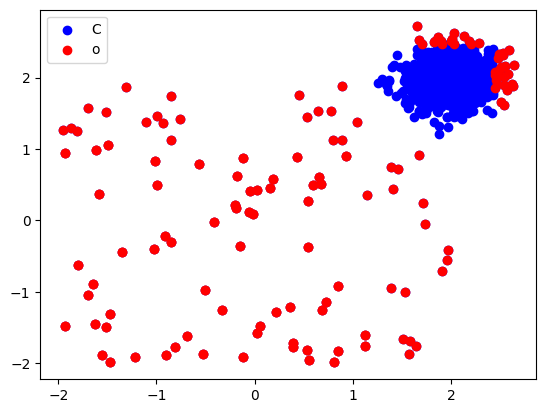

In [27]:
import pprint
# compute the threshold using np.quantile() for the percentage
percentage = 0.1  # 10% anomalies
threshold = np.quantile(z_scores, 1 - percentage)  # Upper quantile for anomalies
pprint.pprint(threshold)
# Detect outliers based on the computed threshold
outliers = np.where(z_scores > threshold)
print("Z-score detected outliers at indices:")
pprint.pprint( outliers[0])

# Plot Z-score outliers
pyplot.scatter(X_train[:, 0], X_train[:, 1], c='blue', label='Train data')
pyplot.scatter(X_train[outliers[0], 0], X_train[outliers[0], 1], c='red', label='Z-score Outliers')
pyplot.legend("Computed Z-score outliers")
pyplot.show()

np.float64(0.882523640587241)
Z-score detected outliers at indices:
array([  8,  17,  27,  34,  53,  64, 124, 208, 210, 220, 244, 247, 268,
       298, 307, 338, 343, 348, 353, 391, 404, 406, 419, 521, 572, 574,
       583, 588, 621, 623, 648, 658, 730, 745, 749, 774, 785, 848, 849,
       850, 900, 900, 901, 901, 902, 903, 903, 904, 904, 905, 906, 907,
       907, 908, 909, 909, 910, 911, 912, 913, 913, 914, 914, 915, 915,
       916, 917, 917, 918, 919, 919, 920, 920, 921, 921, 922, 923, 923,
       924, 924, 925, 925, 926, 927, 927, 928, 928, 929, 929, 930, 930,
       931, 931, 932, 932, 933, 933, 934, 934, 935, 936, 936, 937, 938,
       939, 940, 940, 941, 941, 942, 942, 943, 943, 944, 945, 945, 946,
       946, 947, 947, 948, 948, 949, 950, 950, 951, 952, 953, 954, 955,
       955, 956, 956, 957, 957, 958, 958, 959, 959, 960, 960, 961, 962,
       962, 963, 964, 964, 965, 965, 966, 966, 967, 967, 968, 968, 969,
       970, 971, 972, 972, 973, 974, 974, 975, 975, 976, 977, 978, 9

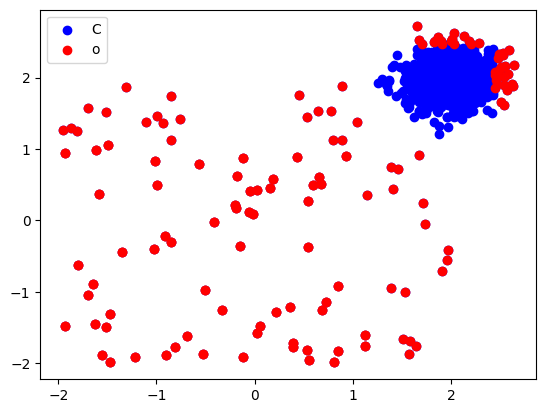

In [31]:
# trying out other methods on quantile
threshold = np.quantile(z_scores, 1 - percentage, method='averaged_inverted_cdf')  # Upper quantile for anomalies
pprint.pprint(threshold)
# Detect outliers based on the computed threshold
outliers = np.where(z_scores > threshold)
print("Z-score detected outliers at indices:")
pprint.pprint( outliers[0])

# Plot Z-score outliers
pyplot.scatter(X_train[:, 0], X_train[:, 1], c='blue', label='Train data')
pyplot.scatter(X_train[outliers[0], 0], X_train[outliers[0], 1], c='red', label='Z-score Outliers')
pyplot.legend("Computed Z-score outliers")
pyplot.show()